## Change point detection ruptures/regression approach

In [ ]:
!pip3 install ruptures


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.6 MB/s eta 0:00:00


In [ ]:
import ruptures
print(ruptures.__version__)


1.1.7


In [ ]:
help(ruptures)

Help on package ruptures:

NAME
    ruptures - Offline change point detection for Python.

PACKAGE CONTENTS
    base
    costs (package)
    datasets (package)
    detection (package)
    exceptions
    metrics (package)
    show (package)
    utils (package)
    version

VERSION
    1.1.7

FILE
    /usr/local/lib/python3.8/dist-packages/ruptures/__init__.py




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a Series with 50 random values
data = pd.Series(np.random.randn(100))
print(data)



0     0.618872
1     0.024810
2    -0.175228
3    -0.917193
4    -0.236637
        ...   
95    0.629449
96    0.700762
97    2.421694
98   -1.439414
99   -0.007111
Length: 100, dtype: float64


In [ ]:
# import statsmodels.api as sm

# # Fit the data to an AR(1) model
# model = sm.tsa.AR(data).fit()

# # Extract the AIC from the model
# aic = model.aic
# print(aic)

## Proxy grid search + Least cost value for selecting indices

In [ ]:
import ruptures as rpt
## proxy grid search +eval metrics - https://centre-borelli.github.io/ruptures-docs/user-guide/metrics/hausdorff/

cost_val=[]
##proxy grid search
for min_size in [1,5]:
  for jump in [5,10]:
    for pen in [0.5,1,10]:

      c = rpt.costs.CostL1()
      
      algo = rpt.Pelt(custom_cost=c, min_size=min_size, jump=jump).fit(data.values)
      result = algo.predict(pen=pen)

      # Print the change points
      print(f'minsize is {min_size},jump is {jump},penalty is {pen} and the predicted results are {result}\n\n')


      #Print the costs
      print(c.sum_of_costs(result))  

      cost_val.append((min_size,jump,pen,c.sum_of_costs(result),result))
      
      # fig,ax=plt.subplots()
      # ax.plot(data.values,color='tab:red')
      # for r in result:
      #   ax.axvline(x=r,color='k',linestyle='--')



df = pd.DataFrame(cost_val, columns=['Min Size', 'Jump','Penalty','Cost','Indices'])

print(df)

minsize is 1,jump is 5,penalty is 0.5 and the predicted results are [5, 20, 25, 45, 50, 55, 60, 75, 80, 85, 100]


75.4924266977703
minsize is 1,jump is 5,penalty is 1 and the predicted results are [25, 45, 80, 85, 100]


80.14516216311789
minsize is 1,jump is 5,penalty is 10 and the predicted results are [100]


87.74392604887736
minsize is 1,jump is 10,penalty is 0.5 and the predicted results are [10, 20, 40, 80, 90, 100]


82.75965286503143
minsize is 1,jump is 10,penalty is 1 and the predicted results are [30, 40, 100]


84.90611429901242
minsize is 1,jump is 10,penalty is 10 and the predicted results are [100]


87.74392604887736
minsize is 5,jump is 5,penalty is 0.5 and the predicted results are [5, 20, 25, 45, 50, 55, 60, 75, 80, 85, 100]


75.4924266977703
minsize is 5,jump is 5,penalty is 1 and the predicted results are [25, 45, 80, 85, 100]


80.14516216311789
minsize is 5,jump is 5,penalty is 10 and the predicted results are [100]


87.74392604887736
minsize is 5,jump is 10,

## Bayesian Approach

In [ ]:
!pip install git+https://github.com/hildensia/bayesian_changepoint_detection.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/hildensia/bayesian_changepoint_detection.git to /tmp/pip-req-build-z9x277a2
  Running command git clone --filter=blob:none --quiet https://github.com/hildensia/bayesian_changepoint_detection.git /tmp/pip-req-build-z9x277a2
  Resolved https://github.com/hildensia/bayesian_changepoint_detection.git to commit 6975c16c860f70ff7bd707aec3109b81056faf6a
  Preparing metadata (setup.py) ... done


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from __future__ import division

In [ ]:
import numpy as np
import pandas as pd
import random

# Normal Distribution
normal_data = np.random.normal(5, 2, 100)

# # Poisson Distribution
# poisson_data = np.random.poisson(5, 100)

# # Exponential Distribution
# exponential_data = np.random.exponential(2, 100)

# # Binomial Distribution
# binomial_data = np.random.binomial(20, 0.5, 200)

# # Uniform Distribution
# uniform_data = np.random.uniform(0, 1, 200)

# Creating a dataframe to hold the time series data
df = pd.DataFrame(
    {'Normal': normal_data
    ,
    #  'Poisson': poisson_data,
    #  'Exponential': exponential_data,
    #  'Binomial': binomial_data,
    #  'Uniform': uniform_data
    })

# Print the dataframe
print(df)


      Normal
0   8.938081
1   8.230848
2   5.273579
3   5.569652
4   4.952134
..       ...
95  4.023166
96  4.445428
97  5.310763
98  2.620287
99  8.050335

[100 rows x 1 columns]


Text(0, 0.5, 'Value')

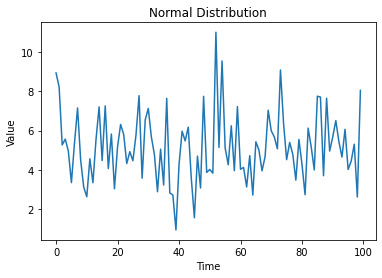

In [ ]:
# Customizing subplots
fig, ax = plt.subplots()
ax.plot(df['Normal'])
ax.set_title('Normal Distribution')
ax.set_xlabel('Time')
ax.set_ylabel('Value')

# axs[0, 1].plot(df['Poisson'])
# axs[0, 1].set_title('Poisson Distribution')
# axs[0, 1].set_xlabel('Time')
# axs[0, 1].set_ylabel('Value')



In [ ]:
data=df['Normal']

In [ ]:
from bayesian_changepoint_detection.priors import const_prior
from functools import partial

prior_function = partial(const_prior, p=1/(len(data) + 1))
a=prior_function(data)
p=1/(len(data) + 1)
p,a


(0.009900990099009901, -4.61512051684126)

In [ ]:
from bayesian_changepoint_detection.bayesian_models import offline_changepoint_detection
import bayesian_changepoint_detection.offline_likelihoods as offline_ll

Q, P, Pcp = offline_changepoint_detection(data, prior_function ,offline_ll.StudentT(),truncate=-40)

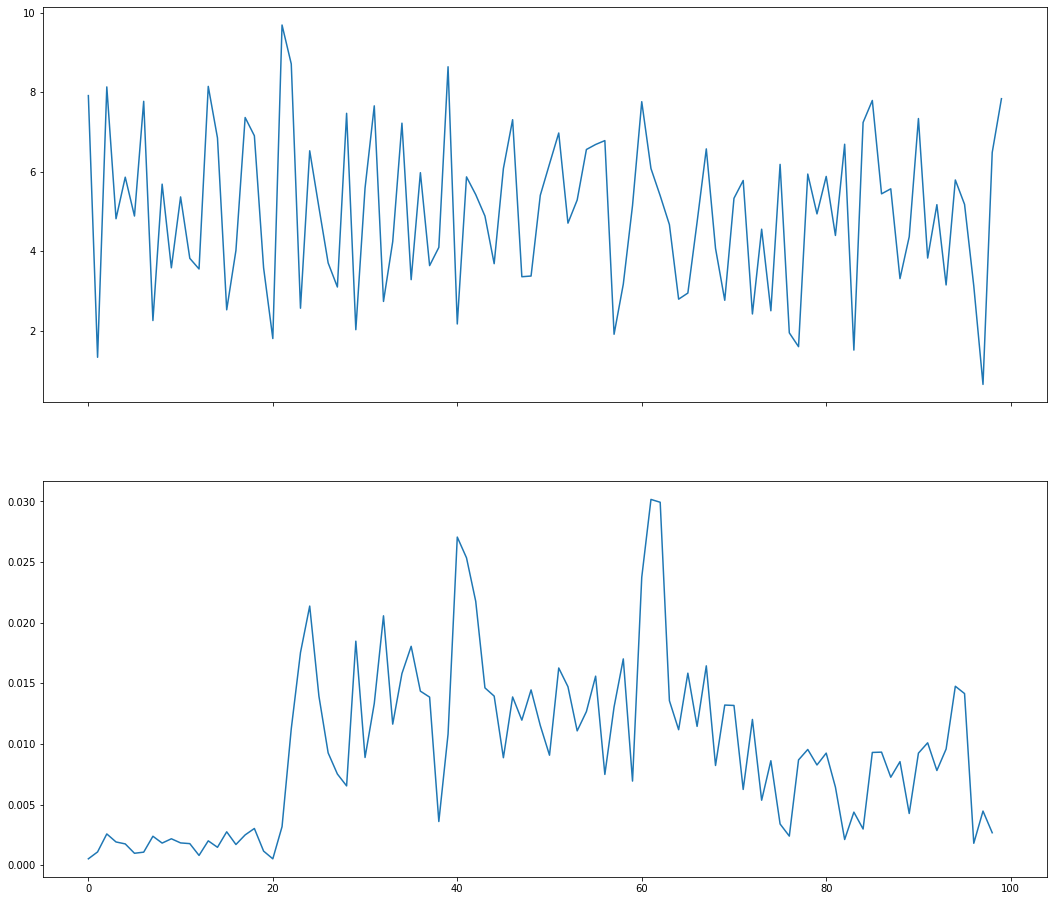

In [ ]:
fig, ax = plt.subplots(2, figsize=[18, 16], sharex=True)
ax[0].plot(data[:])
ax[1].plot(np.exp(Pcp).sum(0))

In [ ]:
np.exp(Pcp).sum(0)[55:70]

array([0.03945836, 0.03048396, 0.02598887, 0.01528615, 0.02633655,
       0.02400701, 0.01454476, 0.0295369 , 0.01211341, 0.04001546,
       0.03234597, 0.02342293, 0.02966727, 0.01469319, 0.01896049])

## Approach autoencoder

In [8]:
import tensorflow as tf

In [9]:
print(tf.__version__)

2.9.2


In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [11]:
import pickle

def save_pickle(obj, file_path, type_pickle=None):
    file_path = file_path + type_pickle
    with open(file_path, "wb") as f:
        pickle.dump(obj, f)



In [12]:
RANDOM_SEED = 42 


In [17]:
dataset = pd.read_csv("creditcard.csv")
dataset.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11959 non-null  int64  
 1   V1      11959 non-null  float64
 2   V2      11959 non-null  float64
 3   V3      11959 non-null  float64
 4   V4      11959 non-null  float64
 5   V5      11959 non-null  float64
 6   V6      11959 non-null  float64
 7   V7      11959 non-null  float64
 8   V8      11959 non-null  float64
 9   V9      11959 non-null  float64
 10  V10     11959 non-null  float64
 11  V11     11959 non-null  float64
 12  V12     11959 non-null  float64
 13  V13     11959 non-null  float64
 14  V14     11959 non-null  float64
 15  V15     11959 non-null  float64
 16  V16     11959 non-null  float64
 17  V17     11959 non-null  float64
 18  V18     11959 non-null  float64
 19  V19     11959 non-null  float64
 20  V20     11958 non-null  float64
 21  V21     11958 non-null  float64
 22

In [19]:
normal_dataset = dataset[dataset.Class == 0]
fraud_dataset = dataset[dataset.Class == 1]
normal_dataset.head(2)
fraud_dataset.to_csv('fraud_data.csv',index=False)

In [20]:
len(normal_dataset)

11906

In [25]:
def preprocess_data(data,numerical_encoding_scheme='Standard', categorical_encoding_scheme='label',drop_list=[]):
    # Copy the input data so as to not modify the original data
    df = data.copy()
    
    # Encoding categorical and ordinal features
    #save_pickle(obj, file_path, type_pickle=None):
    if categorical_encoding_scheme == 'label':
        le_dict = {}
        for col in df.columns:
            if df[col].dtype == 'object':
                le = LabelEncoder()                
                df[col] = le.fit_transform(df[col].values.reshape(-1,1))
                le_dict[col] = le
        save_pickle(le_dict, '', type_pickle='_Label_Encoder.pkl')

    elif categorical_encoding_scheme == 'onehot':        
        for col in df.columns:
            if df[col].dtype == 'object':
                df = pd.concat([df, pd.get_dummies(df[col], prefix=col, drop_first=True)], axis=1)
                df.drop([col], axis=1, inplace=True)
    elif categorical_encoding_scheme == 'ordinal':
        oe_dict = {}
        for col in df.columns:
            if df[col].dtype == 'object':
                oe=OrdinalEncoder()
                df[col] = oe.fit_transform(df[col].values.reshape(-1,1))
                oe_dict[col]=oe
        save_pickle(oe_dict, '', type_pickle='_Ordinal_Encoder.pkl')

    # Drop invalid columns
    if drop_list:
      df = df.drop(drop_list, axis=1)
    else:
      pass
    
     # Numerical features
    if numerical_encoding_scheme=='Standard':
      ss_dict={}
      for col in df.columns:
        if df[col].dtype in ['float64','int64']:
          ss=StandardScaler()
          df[col] = ss.fit_transform(df[col].values.reshape(-1,1))
          ss_dict[col]=ss
      save_pickle(ss_dict, '', type_pickle='_Standard_Scaler.pkl')
    else:
      mm_dict={}
      for col in df.columns:
        if df[col].dtype in ['float64','int64']:
          mm=MinMaxScaler()()
          df[col] = mm.fit_transform(df[col].values.reshape(-1,1))
          mm_dict[col]=mm
      save_pickle(mm_dict, '', type_pickle='_MinMax_Scaler.pkl')

    return df


In [26]:
#preprocess_data(data,numerical_encoding_scheme='Standard', categorical_encoding_scheme='label',drop_list=[]):
normal_dataset_sc_train=preprocess_data(normal_dataset,'Standard','label',drop_list=['Time','Class'])
normal_dataset_sc_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.754770,-0.261069,1.442520,0.795631,-0.224745,0.241107,0.329153,0.122246,-0.486749,0.331722,...,0.401944,0.048857,0.689862,-0.165617,0.081182,0.053759,-0.446462,0.325204,-0.081797,0.492874
1,0.906984,0.005023,-0.684630,0.136249,0.117427,-0.178436,0.018131,0.111296,-1.021605,0.085191,...,-0.156748,-0.177554,-0.772818,0.283414,-0.607287,0.145334,0.113991,-0.036300,0.057131,-0.335500
2,-0.753824,-1.256076,0.757541,0.087770,-0.366374,1.271666,0.868226,0.242231,-2.109288,0.443476,...,0.878832,0.339476,1.477996,1.997002,-1.198708,-1.027623,-0.357471,-0.153900,-0.232070,1.784174
3,-0.498483,-0.349348,0.775299,-0.793583,0.057017,0.845540,0.327210,0.346739,-1.999045,0.192330,...,-0.398977,-0.049354,0.254870,-0.334928,-2.021765,1.283666,-0.504843,0.145556,0.238603,0.345613
4,-0.623497,0.485172,0.556042,0.104258,-0.283906,-0.041130,0.674307,-0.175129,-0.094639,0.965128,...,0.675857,0.058543,1.520446,-0.222836,0.207002,-0.739293,0.783663,0.542967,0.835423,0.043930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11953,-0.294568,0.088235,1.148927,-1.707249,0.453442,0.518325,0.356780,0.109959,1.181592,-1.603168,...,-0.063812,-0.094697,0.488720,-1.003457,-2.031751,1.018474,-1.461250,-0.187072,-0.685609,-0.283857
11954,1.110398,-0.527172,-0.654462,-0.733644,-0.314004,-0.207175,-0.669414,-0.090277,-0.203405,0.481426,...,0.101932,-0.079834,-0.100298,-0.235139,-1.821637,1.003500,-0.528209,-0.044178,0.003468,-0.299925
11955,0.869952,-0.128294,-0.584603,0.045167,0.703935,1.126340,-0.352913,0.356868,0.429497,-0.382753,...,-0.444669,-0.362890,-0.940183,0.539921,-3.178642,-0.511173,0.386477,0.017926,-0.035342,-0.345084
11956,-3.975302,2.893157,-5.059304,0.910099,-3.314098,-1.447815,-1.961047,3.138235,-0.055148,0.489317,...,-0.170653,0.148652,0.182721,-0.162272,1.138163,-0.871970,-0.906243,0.526425,-0.120504,0.156687


In [27]:
nb_epoch = 5
batch_size = 64
input_dim = normal_dataset_sc_train.shape[1] 
encoding_dim = 14
hidden_dim_1 = int(encoding_dim / 2) #
hidden_dim_2=4  
learning_rate = 1e-7

In [28]:
#input Layer
input_layer = tf.keras.layers.Input(shape=(input_dim, ))
#Encoder
encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh",activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
encoder=tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)
# Decoder
decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
decoder=tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)
#Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense (Dense)               (None, 14)                420       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 4)                 32        
                                                                 
 dense_3 (Dense)             (None, 7)                 35        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0     

In [29]:
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

In [30]:
history = autoencoder.fit(normal_dataset_sc_train, normal_dataset_sc_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,                    
                    verbose=1                   
                    ).history


Epoch 1/5
187/187 [==============================] - 3s 4ms/step - loss: 0.9748 - accuracy: 0.0655
Epoch 2/5
187/187 [==============================] - 1s 4ms/step - loss: 0.9187 - accuracy: 0.1341
Epoch 3/5
187/187 [==============================] - 1s 4ms/step - loss: 0.8893 - accuracy: 0.1373
Epoch 4/5
187/187 [==============================] - 1s 4ms/step - loss: 0.8653 - accuracy: 0.1531
Epoch 5/5
187/187 [==============================] - 1s 4ms/step - loss: 0.8491 - accuracy: 0.1557


In [31]:
autoencoder.save("autoencoder.h5")


# Load pickles

In [32]:
import pickle
def load_pickle(file_path,type_pickle=None):
    file_path = file_path + type_pickle
    with open(file_path, "rb") as f:
        obj = pickle.load(f)
    return obj

In [36]:
def preprocess_data_test(data,numerical_decoding_scheme='Standard', categorical_decoding_scheme='label',drop_list=[]):
    # Copy the input data so as to not modify the original data
    df = data.copy()
    

    if categorical_decoding_scheme == 'label':
        le_dict=load_pickle('',type_pickle='_Label_Encoder.pkl')
        for column, le in le_dict.items():
            df[column] = le.transform(df[column].values.reshape(-1,1))

    elif categorical_decoding_scheme == 'onehot':        
        for col in df.columns:
            if df[col].dtype == 'object':
                df = pd.concat([df, pd.get_dummies(df[col], prefix=col, drop_first=True)], axis=1)
                df.drop([col], axis=1, inplace=True)
                
    elif categorical_decoding_scheme == 'ordinal':
        oe_dict=load_pickle('',type_pickle='_Ordinal_Encoder.pkl')
        for column, oe in oe_dict.items():
            df[column] = oe.transform(df[column].values.reshape(-1,1))

                
    # Drop invalid columns
    if drop_list:
      df = df.drop(drop_list, axis=1)
    else:
      pass
    
     # Numerical features
    if numerical_decoding_scheme=='Standard':
      ss_dict=load_pickle('',type_pickle='_Standard_Scaler.pkl')
      for column, ss in ss_dict.items():
        df[column] = ss.transform(df[column].values.reshape(-1,1))
    
    else:
      mm_dict=load_pickle('',type_pickle='_MinMax_Scaler.pkl')
      for column, mm in mm_dict.items():
        df[column] = mm.transform(df[column].values.reshape(-1,1))
    
    return df


In [37]:
fraud_dataset=pd.read_csv("fraud_data.csv")
fraud_dataset.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1.0
1,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.0,1.0


In [38]:
fraud_dataset_sc_test=preprocess_data_test(fraud_dataset,'Standard','label',drop_list=['Time','Class'])
fraud_dataset_sc_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.375027,1.328559,-2.279033,2.653067,-0.382686,-1.213671,-2.383477,1.163584,-3.193693,-2.406523,...,0.184911,0.633292,0.190518,-0.917820,0.509844,-0.145412,0.206410,0.648781,-0.556405,-0.350666
1,-1.851290,-2.682696,0.142925,1.441179,1.233941,-0.935087,0.413136,-0.011845,-1.035017,-0.557141,...,3.628512,0.790946,0.941443,2.986307,-0.529358,0.412319,-0.368618,-0.654584,0.138832,2.631773
2,-1.369246,1.177237,-1.156960,1.470674,-0.639905,-0.173373,0.644395,-0.278714,-1.006773,-1.214022,...,-0.785943,-0.252190,-1.241571,0.434895,-0.179900,-0.621015,-1.075418,0.086827,-0.594276,1.002031
3,-2.733356,0.862510,-3.161350,1.718505,-0.903190,-1.429309,-3.320066,-0.157608,-1.014991,-4.347414,...,-0.335471,0.694778,0.528881,-0.856318,-0.122646,0.347384,-1.279773,-2.111245,3.298961,-0.018031
4,0.934582,2.166836,-4.697789,3.174113,3.179051,-1.160685,1.768844,-0.357007,-1.909069,-2.095881,...,-0.020526,-0.344844,-0.877365,-1.324085,-2.795373,3.278511,0.898428,-0.038920,0.569970,-0.345028
5,0.136285,3.044641,-6.435597,4.551680,0.725846,-2.697394,-1.498812,0.167279,-3.215981,-5.673230,...,0.815028,0.466630,-0.723959,-1.075406,0.186138,3.277515,0.793751,1.852625,1.994230,-0.345028
6,0.148235,3.040423,-6.722737,4.319709,1.208051,-2.050783,-1.554850,0.286993,-3.512700,-5.537017,...,0.988243,0.473172,-0.673999,-1.351228,-1.318244,3.553855,0.851953,1.855716,1.928703,-0.345028
7,0.345441,2.711020,-6.018436,4.128069,1.498129,-1.978919,-0.698945,0.149937,-2.713630,-4.665721,...,0.433951,0.239752,-0.794807,-1.100945,-1.244813,3.105025,0.877909,1.331920,1.570581,-0.345028
8,0.336887,2.786535,-5.874126,4.106217,1.400776,-2.156968,-0.634170,0.087524,-3.114735,-4.498387,...,0.640583,0.296730,-0.570255,-1.169310,-0.404183,3.244971,0.763914,1.302402,1.563025,-0.345028
9,0.603367,1.602478,-5.618151,2.660000,-1.420546,-1.449068,-3.781514,0.899473,-1.220852,-4.178463,...,0.843387,0.712343,0.421274,1.343125,-0.649352,-4.619979,0.516107,1.494341,0.385830,-0.345028


In [39]:
autoencoder = tf.keras.models.load_model("autoencoder.h5")


In [40]:
test_x_predictions = autoencoder.predict(fraud_dataset_sc_test)
mse = np.mean(np.power(fraud_dataset_sc_test - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse})
error_df.Reconstruction_error.describe()



2/2 [==============================] - 0s 8ms/step


count     52.000000
mean      27.832060
std       27.562643
min        0.426794
25%        8.473928
50%       13.999036
75%       55.360018
max      127.306760
Name: Reconstruction_error, dtype: float64

In [41]:
threshold_fixed =np.percentile(error_df.Reconstruction_error,75)
threshold_fixed

55.36001796764815

In [42]:
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
error_df['Predicted_errors'] =pred_y
error_df

,Reconstruction_error,Predicted_errors
0,2.808301,0
1,2.064845,0
2,3.016794,0
3,17.869147,0
4,6.220725,0
5,11.675673,0
6,11.750115,0
7,8.778853,0
8,8.789144,0
9,8.871598,0


Int64Index([], dtype='int64') Series([], Name: Reconstruction_error, dtype: float64)
Int64Index([25, 27, 37, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51], dtype='int64') 25     55.422116
27     55.423272
37     55.415140
42     55.683176
43     55.944975
44    127.306760
45     63.582867
46     62.308510
47     61.586905
48     63.590684
49     64.307133
50     65.099271
51     65.968104
Name: Reconstruction_error, dtype: float64


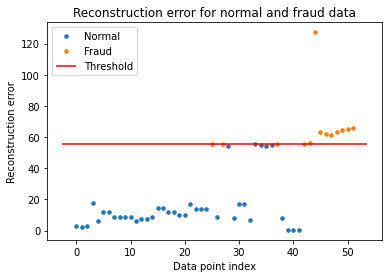

In [56]:
groups = error_df.groupby('Predicted_errors')
fig, ax = plt.subplots()
for name, group in groups:
    print(group.index[group['Predicted_errors']==1],group[group['Predicted_errors']==1]['Reconstruction_error'])

    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and fraud data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();